# Report by: Muhammad Firdaus Abdullah


# **Title**: Steel Industry Energy Consumption

<img src="https://nocamels.com/wp-content/uploads/2013/08/bigstock-Oil-And-Gas-Industry-Refiner-41191342.jpg" alt="Example Image" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">


# Outline
- [1 - Dataset Description](#1)
- [2 - Problem statement](#2)
- [3 - Packages](#3)
- [4 - Dataset](#4)
    - [4.1 - Data Exploration](#4.1)
- [5 - Data Visualization and Preprocessing](#5)
- [6 - Model Training and Evaluation](#6)
    - [6.1 - Split  feature and target, X and y](#6.1)
    - [6.2 - Split Dataset to Test Set and Train Data](#6.2)
    - [6.3 - Prepare Machine Learning Model](#6.3)
- [7 - Hyperparameter Tuning](#7)
    - [7.1 - Build function for Grid Search Cross-Validation](#7.1)
    - [7.2 - Tuning Model](#7.2)
- [8 - Results and Discussion](#8)


<a name="1"></a>
## 1 - Dataset Description 

**Title:** Small-Scale Steel Industry Dataset from South Korea

**Data Source:** DAEWOO Steel Co. Ltd, Gwangyang, South Korea; Korea Electric Power Corporation (pccs.kepco.go.kr)

**Dataset Link:** [https://archive.ics.uci.edu/static/public/851/data.csv](https://archive.ics.uci.edu/static/public/851/data.csv)

**Date Donated:**  8/13/2023

**Description:** This dataset contains information collected from a smart small-scale steel industry located in South Korea. DAEWOO Steel Co. Ltd in Gwangyang produces various types of coils, steel plates, and iron plates. The data includes details on electricity consumption stored in a cloud-based system, as well as energy consumption information from the Korea Electric Power Corporation website (pccs.kepco.go.kr), showcasing daily, monthly, and annual perspectives.

**Feature Type:** Real, Categorical

**Target Variable:** Usage_kWh

**Dataset Characteristics:** Multivariate

**Subject Area:** Physics and Chemistry

**Associated Tasks:** Regression

**Instances:** 35040  
**Features:** 9  

**Additional Information:** The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.


<a name="2"></a>
## 2 - Problem statement 

Develop a predictive model to forecast energy consumption in small-scale steel industries, leveraging multivariate data collected from DAEWOO Steel Co. Ltd in Gwangyang, South Korea. The model should utilize real and categorical features to accurately predict electricity consumption trends on a daily, monthly, and annual basis. The goal is to optimize energy efficiency and inform decision-making processes within the industry, ultimately reducing operational costs and environmental impact.
.




<a name="3"></a>
## 3 - Packages 
There are six core Python packages that we'll be utilizing throughout this project:

1. **Data Manipulation and Analysis**:
   - **Pandas (pd)**: Pandas is used extensively for data manipulation and analysis tasks such as cleaning, transforming, and analyzing structured data stored in DataFrame and Series objects.
   - **NumPy (np)**: NumPy is primarily used for numerical computations and provides support for multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

2. **Data Visualization**:
   - **Matplotlib (plt)**: Matplotlib is used for creating static, interactive, and animated visualizations to explore and communicate insights from data. It provides a wide range of plotting functions and customization options.
   - **Seaborn (sns)**: Seaborn is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics. It simplifies the process of creating complex visualizations and provides additional functionality for exploring and analyzing data.

3. **Machine Learning and Modeling**:
   - **Scikit-learn (sklearn)**:
     - **Preprocessing**: Scikit-learn's preprocessing module (`preprocessing`) is used for preprocessing data before modeling. This includes scaling, normalizing, and encoding categorical variables to prepare the data for machine learning algorithms.
     - **Model Selection**: Scikit-learn's model selection module (`train_test_split`, `KFold`, `GridSearchCV`) is used for splitting the dataset into training and testing sets, performing cross-validation, and hyperparameter tuning using grid search.
     - **Regression**: Scikit-learn provides various regression algorithms (`LinearRegression`, `Ridge`, `Lasso`) for modeling the relationship between independent variables and a continuous dependent variable.
     
     - **Feature Selection**: Scikit-learn provides methods (`SelectKBest`, `f_regression`) for selecting the most important features from the dataset, which can improve model performance and reduce overfitting.

4. **Warnings Handling**:
   - **Warnings**: The `warnings` module is used to handle warnings generated during code execution. It allows you to control how warnings are displayed or ignored.

In [1]:
# For numerical computations
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For setting options in pandas
from pandas import set_option

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing data
from sklearn import preprocessing
from sklearn import metrics
# For label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# For logistic regression modeling
from sklearn.linear_model import LogisticRegression

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For cross-validation
from sklearn.model_selection import KFold

# For hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

# For ignoring warnings
import warnings

# For feature selection
from sklearn.feature_selection import SelectKBest, f_regression

# For linear regression modeling
from sklearn.linear_model import LinearRegression

# For evaluating regression models
from sklearn.metrics import mean_squared_error

# For regularization with Ridge regression
from sklearn.linear_model import Ridge

# For regularization with Lasso regression
from sklearn.linear_model import Lasso

# For calculating mean squared error, mean absolute error, and square root
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


<a name="4"></a>
## 4 - Dataset 

In [2]:
# Load data from the UCI Machine Learning Repository using pandas.read_csv
data = pd.read_csv("https://archive.ics.uci.edu/static/public/851/data.csv")

# Print the shape of the data (number of rows and columns) to get an initial understanding of the data dimensions
print(data.shape)

(35040, 11)


<a name="4.1"></a>
### 4.1 - Data Exploration

#### Looking at the Raw Data

In [3]:
# Peek at the first 20 rows of the 'data' DataFrame to get a quick overview of its structure and content.
peek = data.head(20)
print(peek)

                date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0   01/01/2018 00:15       3.17                                  2.95   
1   01/01/2018 00:30       4.00                                  4.46   
2   01/01/2018 00:45       3.24                                  3.28   
3   01/01/2018 01:00       3.31                                  3.56   
4   01/01/2018 01:15       3.82                                  4.50   
5   01/01/2018 01:30       3.28                                  3.56   
6   01/01/2018 01:45       3.60                                  4.14   
7   01/01/2018 02:00       3.60                                  4.28   
8   01/01/2018 02:15       3.28                                  3.64   
9   01/01/2018 02:30       3.78                                  4.72   
10  01/01/2018 02:45       3.46                                  4.03   
11  01/01/2018 03:00       3.24                                  3.64   
12  01/01/2018 03:15       3.96                    

#### Data Types

In [4]:
# Print the data types of each column in the DataFrame
types = data.dtypes
print(types)

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object


#### Renaming feature


The renaming of columns, such as `'Lagging_Current_Reactive.Power_kVarh'` to `'Lagging_Current_Reactive_Power_kVarh'` and `'CO2(tCO2)'` to `'CO2'`, likely enhances the clarity and consistency of the dataset. This adjustment facilitates ease of data manipulation, analysis, and visualization, contributing to improved comprehension and usability.

In [5]:
# Renaming columns for clarity and consistency
data = data.rename(columns={"Lagging_Current_Reactive.Power_kVarh": "Lagging_Current_Reactive_Power_kVarh", "CO2(tCO2)": "CO2"})

# Displaying information about the dataset after renaming columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

#### Descriptive Statistics
Descriptive statistics offer valuable insights into the characteristics of each attribute.

In [6]:
# Adjusting pandas display width to 150 characters for improved readability of the output
set_option('display.width', 150)

# Generating descriptive statistics for the dataset and transposing the result for better visualization
description = data.describe()
print(description.T)

                                        count          mean           std  min       25%       50%         75%       max
Usage_kWh                             35040.0     27.386892     33.444380  0.0      3.20      4.57     51.2375    157.18
Lagging_Current_Reactive_Power_kVarh  35040.0     13.035384     16.306000  0.0      2.30      5.00     22.6400     96.91
Leading_Current_Reactive_Power_kVarh  35040.0      3.870949      7.424463  0.0      0.00      0.00      2.0900     27.76
CO2                                   35040.0      0.011524      0.016151  0.0      0.00      0.00      0.0200      0.07
Lagging_Current_Power_Factor          35040.0     80.578056     18.921322  0.0     63.32     87.96     99.0225    100.00
Leading_Current_Power_Factor          35040.0     84.367870     30.456535  0.0     99.70    100.00    100.0000    100.00
NSM                                   35040.0  42750.000000  24940.534317  0.0  21375.00  42750.00  64125.0000  85500.00


In [7]:
# Printing the value counts of each unique value in the DataFrame 'data'
print(data.value_counts)

<bound method DataFrame.value_counts of                    date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2  Lagging_Current_Power_Factor  \
0      01/01/2018 00:15       3.17                                  2.95                                  0.00  0.0                         73.21   
1      01/01/2018 00:30       4.00                                  4.46                                  0.00  0.0                         66.77   
2      01/01/2018 00:45       3.24                                  3.28                                  0.00  0.0                         70.28   
3      01/01/2018 01:00       3.31                                  3.56                                  0.00  0.0                         68.09   
4      01/01/2018 01:15       3.82                                  4.50                                  0.00  0.0                         64.72   
...                 ...        ...                                

#### Check Missing Value in Dataset

Checking for missing values in the data is crucial for several reasons:

- **Data Integrity**: Missing values can indicate potential issues with data collection or recording. Identifying and addressing missing data helps maintain the integrity of the dataset.

- **Data Quality**: Missing values can impact the quality of analysis and modeling results. Detecting and handling missing data appropriately ensures more accurate and reliable insights.

- **Bias Reduction**: Ignoring missing values can introduce bias into analysis and modeling processes, leading to misleading conclusions. Addressing missing data helps reduce bias and improve the validity of findings.

- **Model Performance**: Many machine learning algorithms cannot handle missing values directly. Therefore, dealing with missing data appropriately is essential for achieving optimal model performance.

- **Decision Making**: In real-world scenarios, decisions based on incomplete or inaccurate data can have significant consequences. Detecting missing values allows stakeholders to make informed decisions based on reliable information.


In [8]:
# Count the number of null values in each column
print(data.isnull().sum())

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


`The dataset contain 0 missing value.`

<a name="5"></a>
## 5 - Data Visualization and Preprocessing

`We can see from the data that single students have the highest number of graduants, legally separated have the highest number of dropout and facto union student have equally number of dropout and graduate.`

##### Build Correlation Matrix

In [9]:
# Removing non-numeric columns 'date', 'WeekStatus', 'Day_of_week', and 'Load_Type' from the DataFrame 'data'
# This operation creates a new DataFrame containing only numeric columns
data_only_num = data.drop(['date', 'WeekStatus', 'Day_of_week', 'Load_Type'], axis=1)

# Printing information about the new DataFrame to check data types and missing values
print(data_only_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2                                   35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.9 MB
None


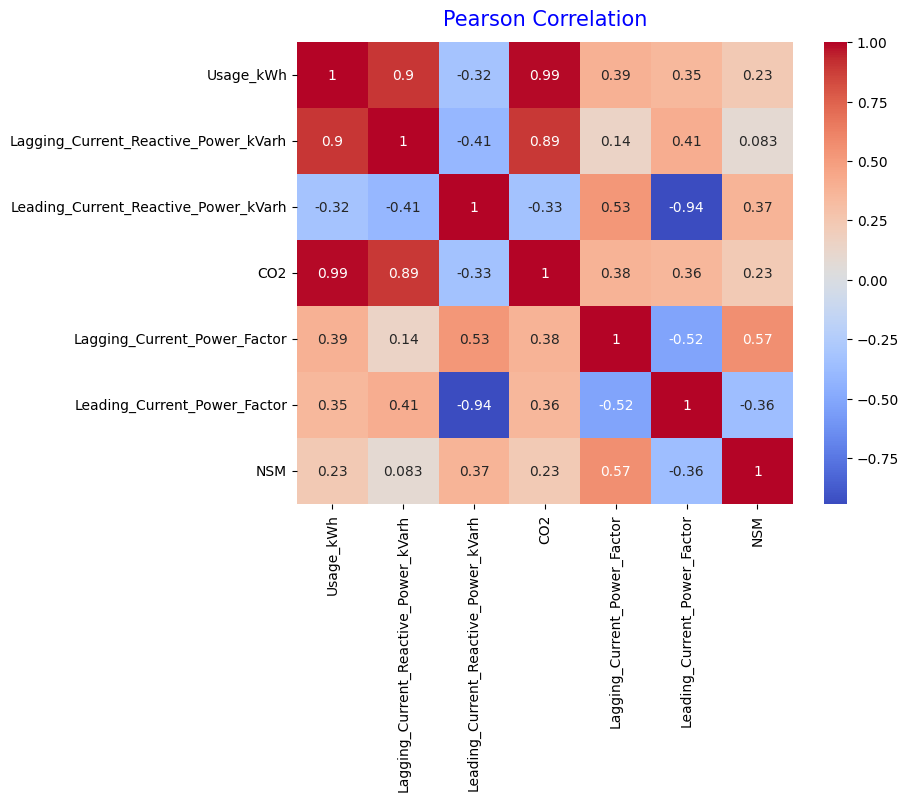

In [10]:
# Creating a heatmap to visualize the Pearson correlation matrix of numeric columns in the DataFrame 'data_only_num'
plt.figure(figsize=(8, 6))
sns.heatmap(data_only_num.corr(), annot=True, cmap='coolwarm')

# Adding title and customizing its properties
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')

# Displaying the heatmap
plt.show()

##### Creating a line plot to visualize the most energy consumption over time

C:\Users\naemah\AppData\Local\Temp\ipykernel_9104\2132634633.py:3: FutureWarning: The provided callable <function max at 0x0000023A3B513C40> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  chart = (pd.pivot_table(data, index='date', values='Usage_kWh', aggfunc={'Usage_kWh': np.max}))[:40].sort_values(by='Usage_kWh', ascending=False).plot(kind='line', color='red')


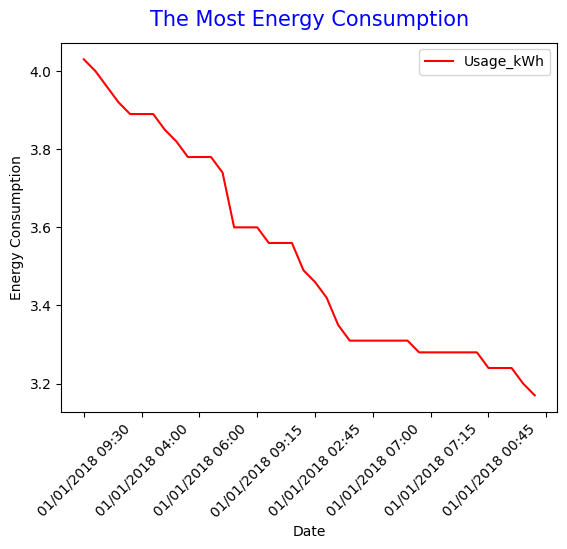

In [11]:
# Using pandas pivot table to aggregate maximum energy consumption values by date
# Limiting the data to the first 40 entries and sorting them by energy consumption in descending order
chart = (pd.pivot_table(data, index='date', values='Usage_kWh', aggfunc={'Usage_kWh': np.max}))[:40].sort_values(by='Usage_kWh', ascending=False).plot(kind='line', color='red')

# Customizing x-axis labels rotation for better readability
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# Adding title and customizing its properties
plt.title('The Most Energy Consumption', fontsize=15, color='b', loc='center', pad=12)

# Adding labels to x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('Energy Consumption')

# Displaying the plot
plt.show()

# Suppressing FutureWarnings for better code readability
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Creating a bar plot to visualize energy consumption based on load type

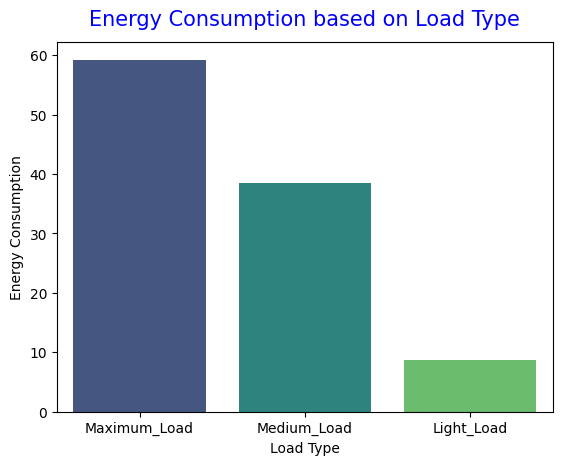

In [12]:
# Using seaborn barplot to display the mean energy consumption for each load type
sns.barplot(data=data.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending=False).reset_index(),
            x='Load_Type', y='Usage_kWh', palette='viridis')

# Customizing the plot by adding a title, labels, and rotating x-axis labels
plt.title('Energy Consumption based on Load Type', fontsize=15, color='b', pad=12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

##### Creating a bar plot to visualize Energy Consumption based on Week Status and Load Type

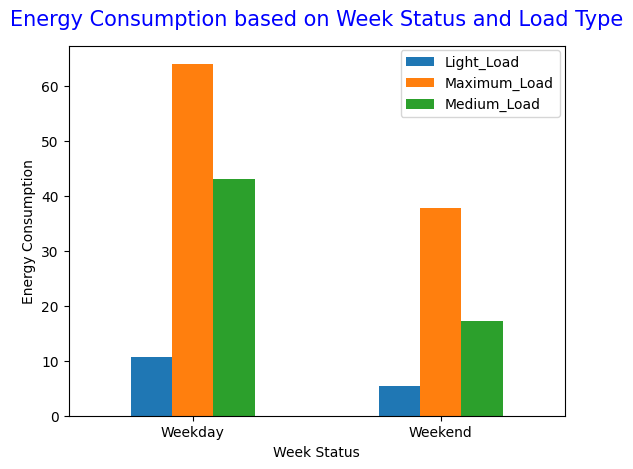

In [13]:
# Group data by 'WeekStatus' and 'Load_Type', calculate mean, and unstack the result
grouped_data = data.groupby(['WeekStatus', 'Load_Type'])['Usage_kWh'].mean().unstack()

# Plot the grouped data
chart = grouped_data.plot(kind='bar')

# Customize the plot
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize=15, pad=15, color='b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor=(0.99, 0.99), borderaxespad=0)
plt.show()

##### Creating a bar plot to visualize Energy Consumption based on Day of Week and Load Type

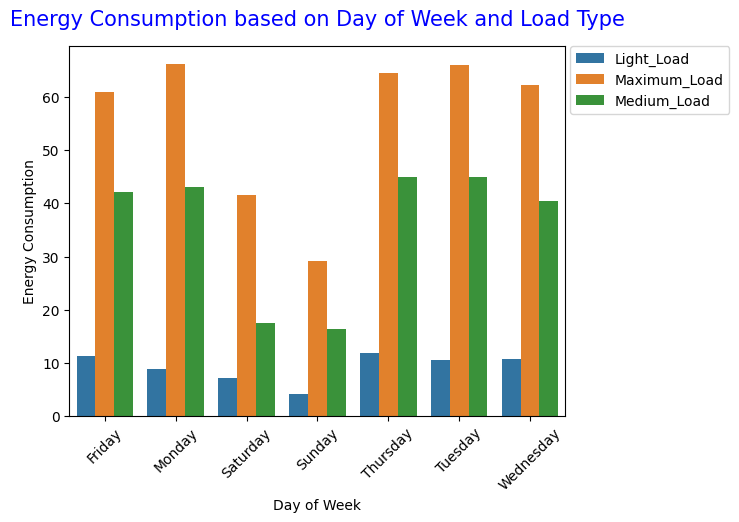

In [14]:
# Grouping the data by 'Day_of_week' and 'Load_Type', calculating mean, and unstacking the result
grouped_data = data.groupby(['Day_of_week', 'Load_Type'])['Usage_kWh'].mean().unstack().reset_index()

# Using seaborn's barplot to create the plot
sns.barplot(data=grouped_data.melt(id_vars='Day_of_week', var_name='Load_Type', value_name='Usage_kWh'),
            x='Day_of_week', y='Usage_kWh', hue='Load_Type')

# Customizing the plot with a title, labels, rotation of x-axis labels, and adding a legend
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize=15, pad=15, color='b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)  # Positioning the legend outside the plot
plt.show()

##### Creating a bar plot to visualize Energy Consumption based on Week Status and Load Type

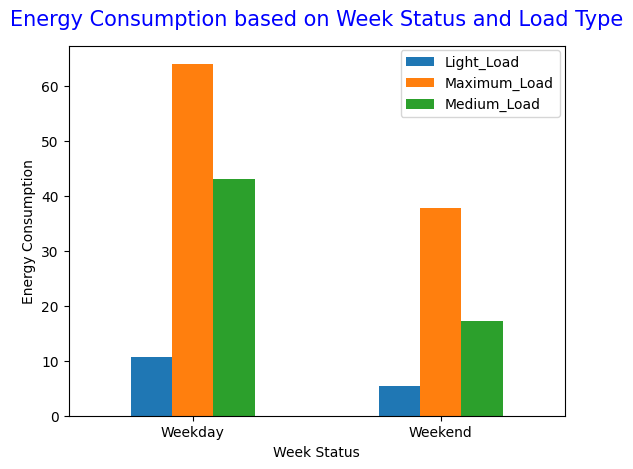

In [15]:
# Grouping the data by 'WeekStatus' and 'Load_Type', calculating mean, and unstacking the result to create a DataFrame suitable for plotting
chart = data.groupby(['WeekStatus', 'Load_Type'])['Usage_kWh'].mean().unstack().plot(kind='bar')

# Customizing the plot with x-axis tick labels rotation, title, labels for both axes, and adding a legend
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)  # Rotate x-axis tick labels for better readability
plt.title('Energy Consumption based on Week Status and Load Type', fontsize=15, pad=15, color='b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor=(0.99, 0.99), borderaxespad=0)  # Positioning the legend outside the plot
plt.show()

In [16]:
# Setting the 'date' column as the index of the DataFrame
data = data.set_index('date')

This operation is useful for time series data analysis, as it allows for easy retrieval of data based on specific dates.

##### One-hot Encoding

In [17]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['WeekStatus', 'Day_of_week', 'Load_Type']

# Apply LabelEncoder to each selected column
data[columns_to_encode] = data[columns_to_encode].apply(encoder.fit_transform)

# Display the updated DataFrame
data.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


After one-hot encoding, the categorical variables were converted into numeric labels as follows:

WeekStatus:
- 0: Weekday
- 1: Weekend

Day_of_week:
- 1: Monday
- 5: Tuesday
- 6: Wednesday
- 4: Thursday
- 0: Friday
- 2: Saturday
- 3: Sunday

Load_Type:
- 0: Light_Load
- 1: Medium_Load
- 2: Maximum_Load

In [18]:
# Verify the DataFrame shape
data.shape

(35040, 10)

<a name="6"></a>
## 6 - Model Training and Evaluation

<a name="6.1"></a>
### 6.1 - Split  feature and target, X and y

In [19]:
# Separate features (input variables) and target variable

# Assign features to X, excluding the Target column
X = data.drop('Usage_kWh', axis=1)

# Assign the Target column as the target variable y
y = data['Usage_kWh']

# Print shapes for verification
print("Dataset shape:", data.shape)
print("\nX shape:", X.shape)
print('\ny shape:', y.shape)

Dataset shape: (35040, 10)

X shape: (35040, 9)

y shape: (35040,)


<a name="6.2"></a>
### 6.2 - Split Dataset to Test Set and Train Data

In [20]:
# Split data into training and testing sets

# Set a random seed for reproducibility
seed = 33

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Print shapes for verification
print("X_train shape:", X_train.shape)
print("\nX_test shape:", X_test.shape)
print("\nY_train shape:", y_train.shape)
print("\nY_test shape:", y_test.shape)

X_train shape: (24528, 9)

X_test shape: (10512, 9)

Y_train shape: (24528,)

Y_test shape: (10512,)


In [21]:
# Perform feature selection using SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)  # Select features for training data
X_test_selected = selector.transform(X_test)  # Select same features for testing data

Using `f_regression scoring` helps to identify features that have a strong linear relationship with the target variable. This is valuable in regression tasks because it can aid in selecting the most relevant features that contribute significantly to predicting the target variable.

In [22]:
# Retrieve the indices of selected features
selected_indices = selector.get_support(indices=True)

# Get the names of selected features from the DataFrame columns
selected_features = X.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Load_Type'], dtype='object')


In [23]:
# Selecting a subset of features from the DataFrame X
X_selected = X[['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Load_Type']]

# Checking the shape of the selected features DataFrame
X_selected.shape

(35040, 5)

<a name="6.3"></a>
### 6.3 - Prepare Machine Learning Model

Three regression models were used in this project:
1. Linear Regression.
2. Ridge Regression.
3. Lasso Regression.

The performance of the regression models can be assessed based on several evaluation metrics:

- **Mean Squared Error (MSE):** Measures the average of the squares of the errors or deviations.
- **Mean Absolute Error (MAE):** Measures the average absolute differences between predicted and actual values.
- **Root Mean Squared Error (RMSE):** Represents the square root of the MSE, providing an interpretable measure in the same units as the target variable.
- **Model Score (R-squared):** Represents the coefficient of determination, indicating the proportion of the variance in the dependent variable that is predictable from the independent variables.

Among the evaluation metrics provided, lower values of MSE, MAE, and RMSE indicate better performance. For the Model Score (R-squared), higher values represent better performance, indicating a higher proportion of variance explained by the model. Therefore, in terms of performance, the best values would be the lowest MSE, MAE, and RMSE, and the highest R-squared value.

##### Linear Regression

In [24]:
# Train a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model_lr.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)

# Print evaluation metrics
print("Linear Regression:")
print("Mean Squared Error:", mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

# Calculate and print model score
score = model_lr.score(X_test_selected, y_test)
print("Model Score:", score)

Linear Regression:
Mean Squared Error: 18.181353421435514
Mean Absolute Error: 2.553094852715799
Root Mean Squared Error: 4.2639598287783524
Model Score: 0.9837680054943234


##### Ridge Regression Model

In [25]:
# Train a Ridge regression model
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model_ridge.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)

# Print evaluation metrics
print("Ridge Regression:")
print("Mean Squared Error:", mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

# Calculate and print model score
score = model_ridge.score(X_test_selected, y_test)
print("Model Score:", score)

Ridge Regression:
Mean Squared Error: 35.23073910285953
Mean Absolute Error: 4.123146757471136
Root Mean Squared Error: 5.935548761728736
Model Score: 0.9685466119989548


##### Lasso Regression Model

In [26]:
# Initialize and fit the Lasso regression model
model_lasso = Lasso()
model_lasso.fit(X_train_selected, y_train)

# Evaluate the model
y_pred_lasso = model_lasso.predict(X_test_selected)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)

# Print evaluation metrics for Lasso
print("Lasso Regression:")
print("Mean Squared Error (Lasso):", mse_lasso)
print('Mean Absolute Error (Lasso):', mae_lasso)
print('Root Mean Squared Error (Lasso):', rmse_lasso)

# Calculate and print score for Lasso model
score_lasso = model_lasso.score(X_test_selected, y_test)
print("Score (Lasso):", score_lasso)

Lasso Regression:
Mean Squared Error (Lasso): 97.28871360955021
Mean Absolute Error (Lasso): 6.891697142159526
Root Mean Squared Error (Lasso): 9.863504124272987
Score (Lasso): 0.9131423371973658


<a name="7"></a>
## 7 - Hyperparameter Tuning

<a name="7.1"></a>
### 7.1 - Build function for Grid Search Cross-Validation

In [27]:
# Function for performing grid search using GridSearchCV
# Parameters:
# - model: The machine learning model to be tuned
# - kfolds: The number of folds for cross-validation
# - params: The parameter grid to search over
# - scoring: The scoring metric to optimize
# Returns:
# - grid_search: GridSearchCV object configured with provided parameters
def grid_search(model, kfolds, params, scoring):
    grid_search = GridSearchCV(model,
                                cv=kfolds,
                                param_grid=params,
                                scoring=scoring,
                                n_jobs=1,
                                verbose=1)
    return grid_search

In [28]:
# Set up k-fold cross-validation with 10 splits, ensuring reproducibility by fixing the random state to 33 and shuffling the data.
kfold = KFold(n_splits=10, random_state=33, shuffle=True)

<a name="7.2"></a>
### 7.2 - Tuning Model

##### Ridge Regression

In [29]:
# Declare hyperparameters for Ridge Regression
params_ridge = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]  # Regularization strength for Ridge Regression
}

# Perform GridSearchCV for Ridge regression using previously defined Ridge Regression model (model_ridge)
grid_search_ridge = grid_search(model_ridge, kfold, params_ridge, scoring=None)

# Fit the grid search object to the training data
grid_search_ridge.fit(X_train_selected, y_train)

# Display the best score and best hyperparameters found by GridSearch for Ridge regression
print("\nBest Score: {:.2f}%".format(grid_search_ridge.best_score_ * 100))
print("\nBest Hyperparameters:", grid_search_ridge.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits

Best Score: 97.87%

Best Hyperparameters: {'alpha': 0.01}


In [30]:
# Initialize and fit the tuned Ridge regression model
tuned_model_ridge = Ridge(alpha=0.01)
tuned_model_ridge.fit(X_train_selected, y_train)

# Evaluate the model
tuned_y_pred_ridge = tuned_model_ridge.predict(X_test_selected)
mse_ridge = mean_squared_error(y_test, tuned_y_pred_ridge)
mae_ridge = metrics.mean_absolute_error(y_test, tuned_y_pred_ridge)
rmse_ridge = math.sqrt(mse_ridge)

# Print evaluation metrics for tuned Ridge
print("Tuned Ridge Regression:")
print("Mean Squared Error (Ridge):", mse_ridge)
print('Mean Absolute Error (Ridge):', mae_ridge)
print('Root Mean Squared Error (Ridge):', rmse_ridge)

# Calculate and print score for tuned Ridge model
tuned_score_ridge = tuned_model_ridge.score(X_test_selected, y_test)
print("Score (Ridge):", tuned_score_ridge)

Tuned Ridge Regression:
Mean Squared Error (Ridge): 18.328874575586656
Mean Absolute Error (Ridge): 2.5807364009120346
Root Mean Squared Error (Ridge): 4.28122349049739
Score (Ridge): 0.9836363011867205


##### Lasso Regression

In [31]:
# Declare hyperparameters for Lasso Regression
params_lasso = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]  # Regularization strength for Lasso
}

# Perform GridSearchCV for Lasso regression using previously defined Lasso Regression model (model_lasso)
grid_search_lasso = grid_search(model_lasso, kfold, params_lasso, scoring=None)

# Fit the grid search object to the training data
grid_search_lasso.fit(X_train_selected, y_train)

# Display the best score and best hyperparameters found by GridSearch for Lasso regression
print("\nBest Score: {:.2f}%".format(grid_search_lasso.best_score_ * 100))
print("\nBest Hyperparameters:", grid_search_lasso.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits

Best Score: 97.53%

Best Hyperparameters: {'alpha': 0.01}


In [32]:
# Initialize and fit the tuned Lasso regression model
tuned_model_lasso = Lasso(alpha=0.01)
tuned_model_lasso.fit(X_train_selected, y_train)

# Evaluate the model
tuned_y_pred_lasso = tuned_model_lasso.predict(X_test_selected)
mse_lasso = mean_squared_error(y_test, tuned_y_pred_lasso)
mae_lasso = metrics.mean_absolute_error(y_test, tuned_y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)

# Print evaluation metrics for tuned Lasso
print("Tuned Lasso Regression:")
print("Mean Squared Error (Lasso):", mse_lasso)
print('Mean Absolute Error (Lasso):', mae_lasso)
print('Root Mean Squared Error (Lasso):', rmse_lasso)

# Calculate and print score for tuned Lasso model
tuned_score_lasso = tuned_model_lasso.score(X_test_selected, y_test)
print("Score (Lasso):", tuned_score_lasso)

Tuned Lasso Regression:
Mean Squared Error (Lasso): 23.9669213205655
Mean Absolute Error (Lasso): 3.2362819287374154
Root Mean Squared Error (Lasso): 4.895602242887539
Score (Lasso): 0.9786027516117286


<a name="8"></a>
## 8 - Results and Discussion


The models show varying levels of performance across the evaluation metrics:

| Model                   | Mean Squared Error     | Mean Absolute Error    | Root Mean Squared Error | Model Score |
|-------------------------|-------------------------|-------------------------|-------------------------|-------------|
| Linear Regression       | 18.181353421435514     | 2.553094852715799      | 4.2639598287783524     | 0.9837680054943234 |
| Tuned Ridge Regression  | 18.328874575586656     | 2.5807364009120346     | 4.28122349049739       | 0.9836363011867205 |
| Tuned Lasso Regression  | 23.9669213205655       | 3.2362819287374154     | 4.895602242887539      | 0.9786027516117286 |

From the results:

- **Linear Regression** demonstrates the lowest MSE, MAE, and RMSE among the models, indicating a better fit to the data compared to the tuned Ridge and Lasso regressions.
- **Tuned Ridge Regression** performs slightly worse than the Linear Regression with slightly higher MSE, MAE, and RMSE, but still provides a high model score.
- **Tuned Lasso Regression** exhibits the highest MSE, MAE, and RMSE, suggesting that it may be less effective in capturing the variability in the data compared to the other models.

Overall, based on these metrics, the Linear Regression model seems to be the most suitable for this dataset, providing the best balance between model simplicity and predictive performance.

### Prediction System Based on Evaluated Machine Learning Model

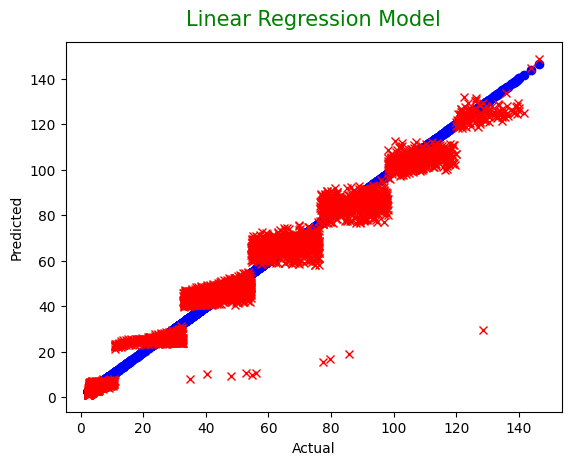

In [33]:
# Visualize model predictions
y_pred = model_lr.predict(X_test_selected)
x = y_test
y_actual = y_test  # Renaming y_test to y_actual for clarity

# Plotting actual vs. predicted values
plt.title('Linear Regression Model', fontsize=15, color='g', pad=12)
plt.plot(x, y_actual, 'o', color='b', label='Actual')  # Plotting actual values with blue circles
plt.plot(x, y_pred, 'x', color='r', label='Predicted')  # Plotting predicted values with red crosses

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [34]:
# Selecting a specific input data point from the dataset for prediction.
input_data = X_selected.iloc[30001]

# Converting the input data to a NumPy array.
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input data to match the expected shape for prediction.
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making a prediction using the tuned logistic regression model.
prediction = model_lr.predict(input_data_reshaped)

# Displaying the predicted result.
print("Prediction result:", prediction)

actual_value = data.iloc[30001, data.columns.get_loc('Usage_kWh')]

# Displaying the actual value
print("\nThe actual value :", actual_value)

Prediction result: [5.00713701]

The actual value : 4.82
